## clustering of the iris data
### This R script is from Clustering & Classification with Machine Learning in R
### by Minerva Singh, of Cambridge University

In [1]:
data(iris)
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


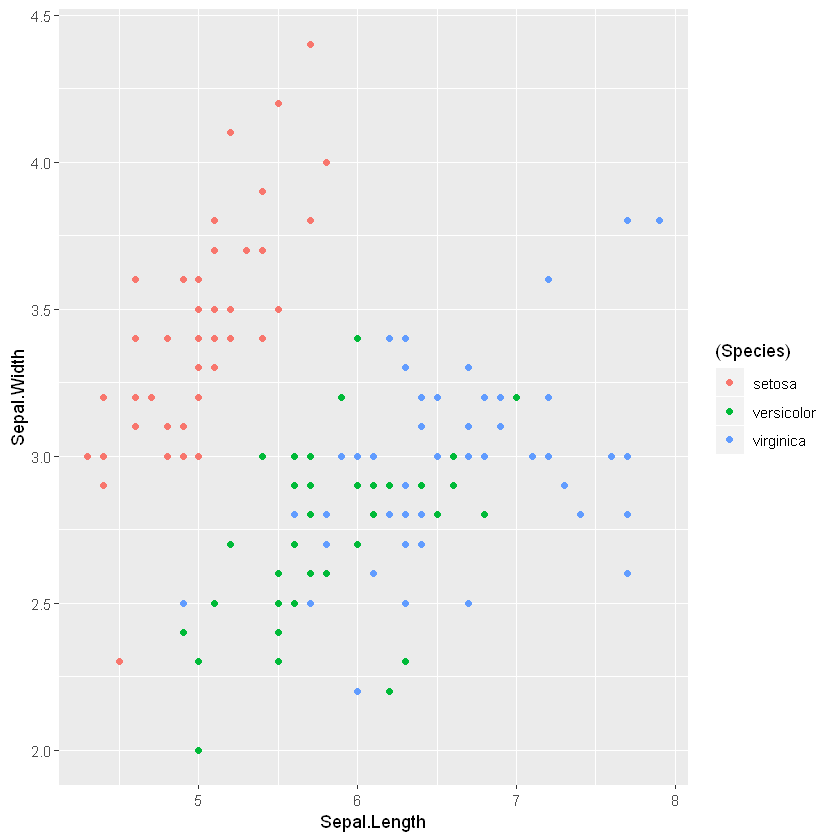

In [2]:
#visualize the distribution of iris species sepal length & width
library(ggplot2)
ggplot(data = iris, aes(Sepal.Length, Sepal.Width)) + geom_point(aes(colour = (Species)))

In [3]:
set.seed(20) #ensure replicability
names(iris)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

In [4]:
#k-means minimize the within group dispersion and maximize the between-group dispersion. 

#1:2- we want to cluster the species on the basis of sepal length and #width
#we want 3 clusters
#nstart- number of starting assignments, select the one with lowest
#within cluster variation 
irisCluster <- kmeans(iris[, 1:2], 3, nstart = 15)
irisCluster

K-means clustering with 3 clusters of sizes 50, 53, 47

Cluster means:
  Sepal.Length Sepal.Width
1     5.006000    3.428000
2     5.773585    2.692453
3     6.812766    3.074468

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 3 2 3 2 3 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2
 [75] 3 3 3 3 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
[112] 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 2 3 3 3 2 3 3 3 2 3 3 3 2 3
[149] 3 2

Within cluster sum of squares by cluster:
[1] 13.1290 11.3000 12.6217
 (between_SS / total_SS =  71.6 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

   
    setosa versicolor virginica
  1     50          0         0
  2      0         38        15
  3      0         12        35

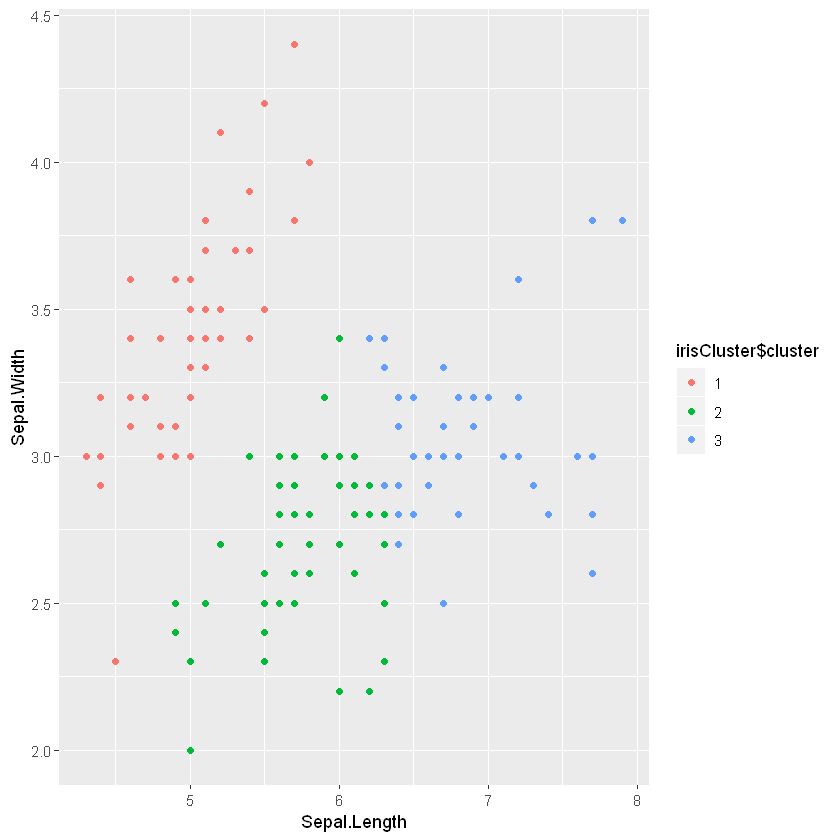

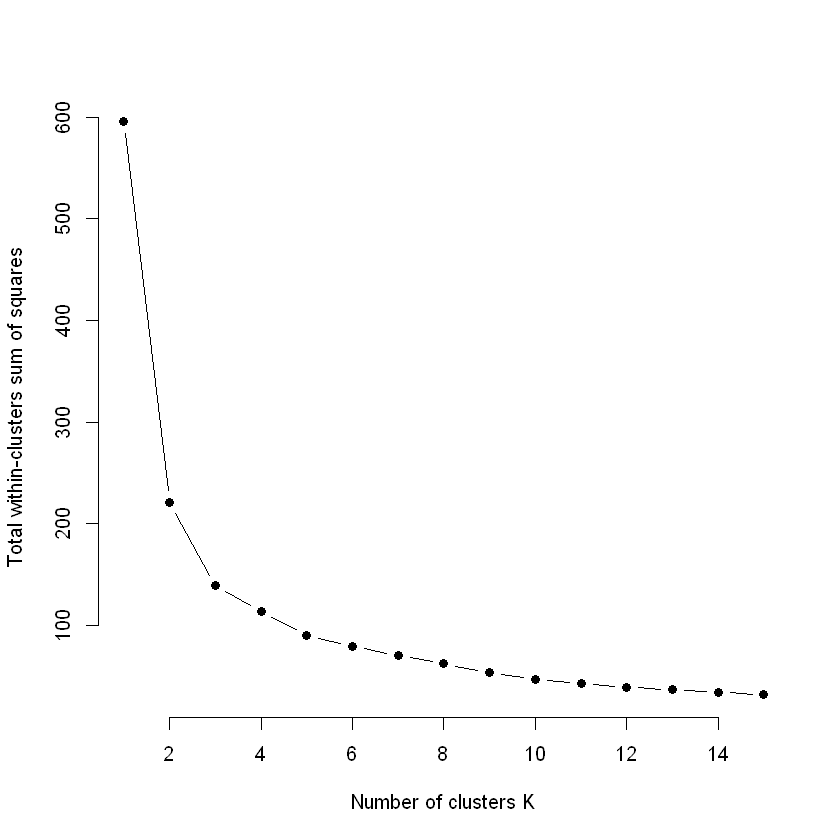

In [5]:
#71 % is a measure of the total variance in data set that is explained by the clustering. k-means minimize the within group dispersion and maximize the between-group dispersion. 

## compare cluster with species
table(irisCluster$cluster, iris$Species)

# all setosa species assigned to cluster 1.
# 38 versicolor assigned to cluster 2 and 12 to cluster 1

irisCluster$cluster <- as.factor(irisCluster$cluster)
ggplot(iris, aes(Sepal.Length, Sepal.Width, color = irisCluster$cluster)) + geom_point()

#Elbow Method for finding the optimal number of clusters
set.seed(123)
# Compute and plot wss for k = 2 to k = 15.
max <- 15
data <- scale(iris[, -5]) #remove species column
wss <- sapply(1:max, 
              function(k){kmeans(data, k, nstart=50,iter.max = 15 )$tot.withinss}) #how many clusters will reduce within group variation

plot(1:max, wss,
     type="b", pch = 19, frame = FALSE, 
     xlab="Number of clusters K",
     ylab="Total within-clusters sum of squares")

In [6]:
##
irisCluster <- kmeans(iris[, 1:2], 5, nstart = 15)
irisCluster
table(irisCluster$cluster, iris$Species)

K-means clustering with 5 clusters of sizes 13, 32, 24, 38, 43

Cluster means:
  Sepal.Length Sepal.Width
1     7.438462    3.130769
2     5.187500    3.637500
3     4.766667    2.891667
4     6.534211    3.042105
5     5.839535    2.709302

Clustering vector:
  [1] 2 3 3 3 2 2 3 2 3 3 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 3 3 2 2 2 3 3 2
 [38] 2 3 2 2 3 3 2 2 3 2 3 2 2 1 4 4 5 4 5 4 3 4 3 3 5 5 5 5 4 5 5 5 5 5 5 5 5
 [75] 4 4 4 4 5 5 5 5 5 5 5 4 4 5 5 5 5 5 5 3 5 5 5 4 3 5 4 5 1 4 4 1 3 1 4 1 4
[112] 4 4 5 5 4 4 1 1 5 4 5 1 4 4 1 5 5 4 1 1 1 4 4 5 1 4 4 5 4 4 4 5 4 4 4 5 4
[149] 4 5

Within cluster sum of squares by cluster:
[1] 2.758462 4.630000 4.451667 3.658158 5.459070
 (between_SS / total_SS =  83.9 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

   
    setosa versicolor virginica
  1      0          1        12
  2     32          0         0
  3     18          5         1
  4      0         13        25
  5      0         31        12

In [7]:
# The follwing package takes a lomg time to install -Dave
# install.packages("factoextra")

Warning message:
"package 'factoextra' was built under R version 3.6.3"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Warning message:
"argument frame is deprecated; please use ellipse instead."Warning message:
"argument frame.type is deprecated; please use ellipse.type instead."

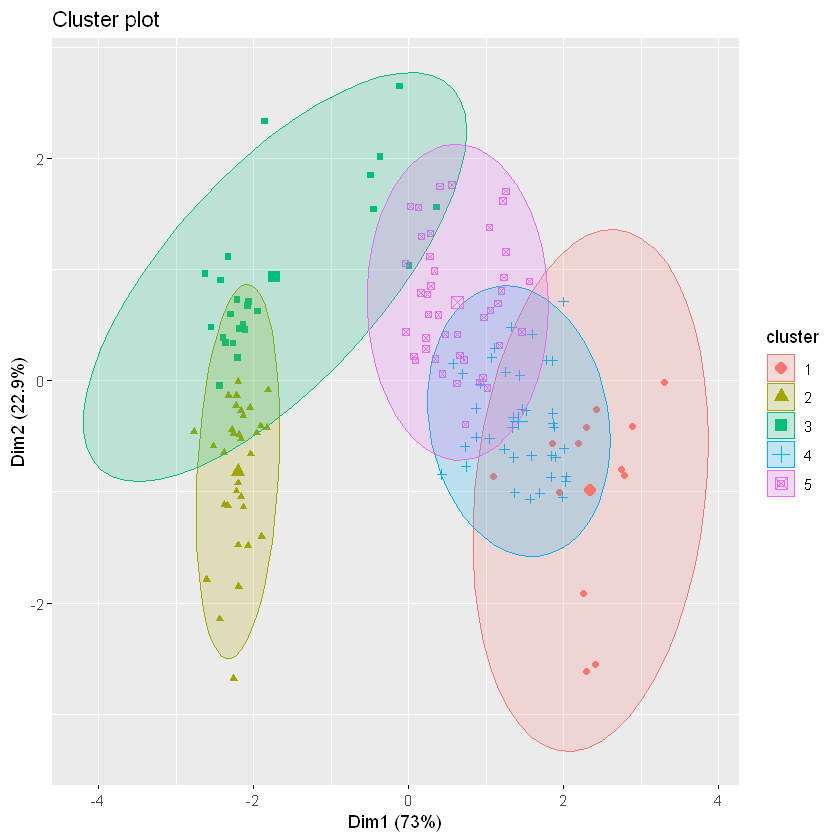

In [8]:
###########
library(factoextra)
fviz_cluster(irisCluster, data = data, geom = "point",
             stand = FALSE, frame.type = "norm")